## Author : John Christian C. Dalton

## Prediction using Supervised Machine Learning (Level - Beginner)

#### In this task, we will predict the percentage score of a student based on the number of hours they studied. 
#### This is a simple linear regression task because it involves only two variables:
#### * Study Hours (Independent Variable)
#### * Exam Score (Dependent Variable)

### Problem Statement

#### What will be the predicted score if a student studies for 9.25 hours per day?

### Importing libraries and DataSet:


In [16]:
# pandas (as pd): This imports the pandas library, a powerful tool for data analysis and manipulation. It's assigned the alias pd for convenience.
# numpy (as np): This imports the NumPy library, which provides efficient tools for numerical computations and array manipulations. 
        #It's assigned the alias np for convenience.
# matplotlib.pyplot (as plt): This imports the plotting library Matplotlib, commonly used for creating various visualizations like scatter plots, 
        #line plots, etc. It's assigned the alias plt for convenience.
# seaborn (as sns): This imports the Seaborn library, built on top of Matplotlib, which provides a high-level interface for creating statistical 
        #graphics. It's assigned the alias sns for convenience.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme ='monokai', context ='notebook', ticks = True , grid = False)

In [18]:
# Retrieves the data from the provided web link using pandas and then provides you with a sneak peek at the first few rows of the data.
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualization
#### Creates a scatter plot to visualize the relationship between the two variables in your data

<Axes: xlabel='Hours', ylabel='Scores'>

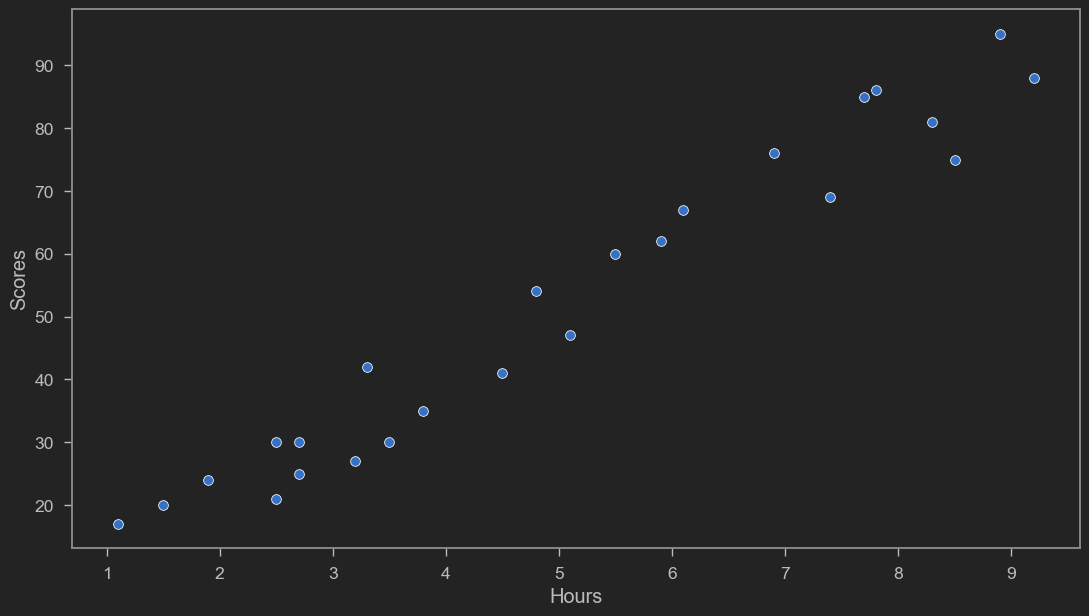

In [5]:
plt.figure(figsize = (13,7))
sns.scatterplot(x ='Hours' , y ='Scores' , data=s_data)

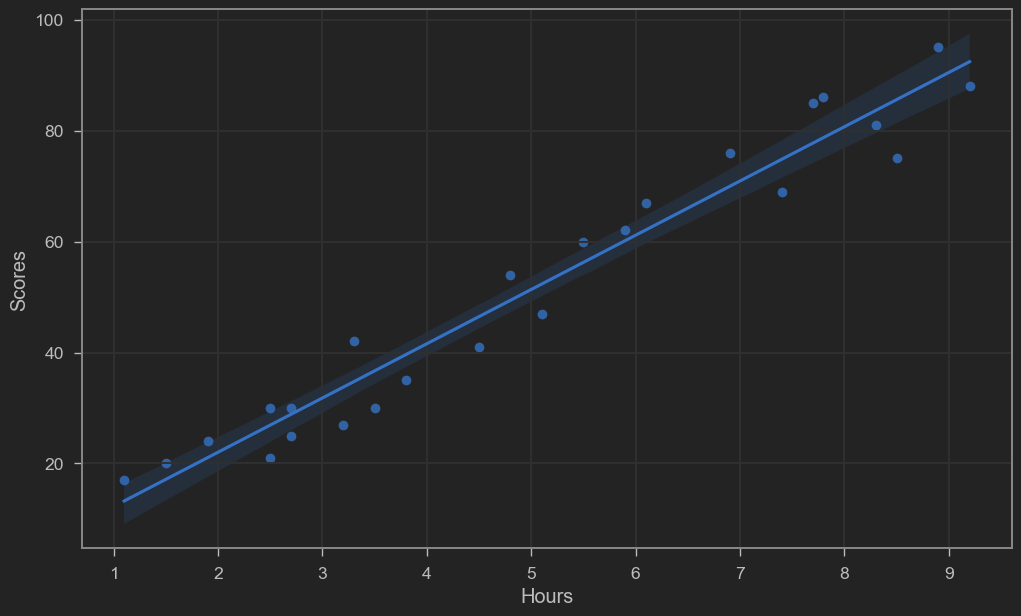

In [19]:
# The plot includes a regression line, which is a statistical tool that approximates a linear trend in the data.
plt.figure(figsize= (12,7))
sns.regplot( x='Hours' , y='Scores', data= s_data)
plt.grid()

## Training and Testing 

In [23]:
# Extracting features and target: It separates the 'Hours' column  and 'Scores' column  from the DataFrame into separate variables X and y.
X = s_data ['Hours']
y = s_data ['Scores']
print('The DataFrame separated into variables X and y.')

The DataFrame separated into variables X and y.


In [24]:
# Converting to NumPy arrays: It converts these variables (X and y) into NumPy arrays, 
    # which are often preferred for machine learning tasks due to their efficient operations.
X = np.array(X)
y = np.array(y)
print('Successfully converted into Numpy arrays.')

Successfully converted into Numpy arrays.


In [25]:
# the -1 ensures that the reshaped array maintains all the elements from X and distributes them into rows while keeping the number of columns as 1.
X = X.reshape(-1,1)
print(X.shape)
y = y.reshape(-1,1)
print(y.shape)

(25, 1)
(25, 1)


In [20]:
## From here, we'll focus on preparing the data for training a model. This involves splitting the data into two parts: training data and testing data.

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2)

In [11]:
# By fitting the model with the training data, the SimpleLinearRegression object learns the relationship between the features (X_train) and the target values (y_train). 
    #This allows it to make predictions for new, unseen data based on the learned relationship.
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept = True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Coefficients (slope) : The slope(s) indicate the impact of each feature on the target variable.
# Intercept (b): It retrieves the y-intercept ( The intercept represents the predicted target value when all features are zero.)
print('Linear Model Coeff (m)' , SimpleLinearRegression.coef_)
print('Linear Model Coeff (b)' , SimpleLinearRegression.intercept_)

Linear Model Coeff (m) [[10.03342544]]
Linear Model Coeff (b) [0.78120153]


### Visualizes the performance of the trained machine learning model:

Text(0.5, 1.0, 'Student Score based on Study Hours')

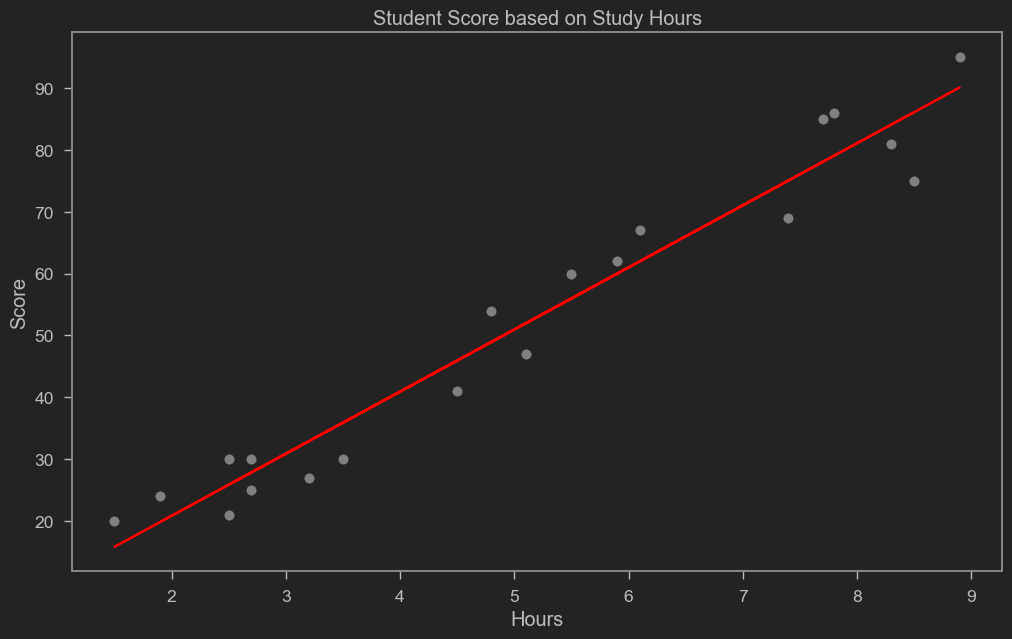

In [13]:
plt.figure(figsize = (12,7))
plt.scatter(X_train, y_train, color='grey')
plt.plot(X_train, SimpleLinearRegression.predict(X_train) , color ='red')
plt.ylabel('Score')
plt.xlabel('Hours')
plt.title('Student Score based on Study Hours')


# These lines provide a quantitative measure of how well the model performs when making predictions for new data it hasn't seen before during training.

In [27]:
# This code calculates a score (R-squared) that reflects how well the model performs on unseen data (testing data).
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.9513289296628246

In [30]:
# This code calculates a more precise metric (R-squared) to evaluate the model's performance on unseen data:
from sklearn.metrics import r2_score
y_pred = SimpleLinearRegression.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


R-squared: 0.9513289296628246


In [32]:
# This code  predicts the score for a student based on their study hours using the trained linear regression model.
Hours = np.array([9.25])
Hours = Hours.reshape(-1,1)

Score = SimpleLinearRegression.predict(Hours)
print('Student Score = ', Score) 

Student Score =  [[93.59038684]]
